In [11]:
import numpy as np
import pandas as pd 
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/californigaHousingPrice.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## В данном датасете мы рассмотрим зависимость стоимости дома в Калифорнии от его расположения относительно океана и то, как стоимость дома связана с доходом владельца

In [35]:
d1 =df[df['ocean_proximity']=='INLAND']
d1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
d2 =df[df['ocean_proximity']!='INLAND']
d2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,<1H OCEAN
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1H OCEAN
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1H OCEAN


In [38]:
median_house_value = smf.ols(formula='np.log(median_house_value)~np.log(median_income)+C(ocean_proximity)', data=df).fit()
median_house_value.params.round(2)

Intercept                           11.38
C(ocean_proximity)[T.INLAND]        -0.50
C(ocean_proximity)[T.ISLAND]         0.77
C(ocean_proximity)[T.NEAR BAY]       0.06
C(ocean_proximity)[T.NEAR OCEAN]     0.05
np.log(median_income)                0.69
dtype: float64

### Чем ближе к океану, тем ниже зависимость между стоимостью дома и доходом владельца

In [19]:
median_house_value = smf.ols(formula='np.log(median_house_value)~np.log(median_income)', data=d1).fit()
median_house_value.params.round(2)

Intercept                10.80
np.log(median_income)     0.76
dtype: float64

In [20]:
median_house_value = smf.ols(formula='np.log(median_house_value)~np.log(median_income)', data=d2).fit()
median_house_value.params.round(2)

Intercept                11.43
np.log(median_income)     0.66
dtype: float64

Подогнанная прямая


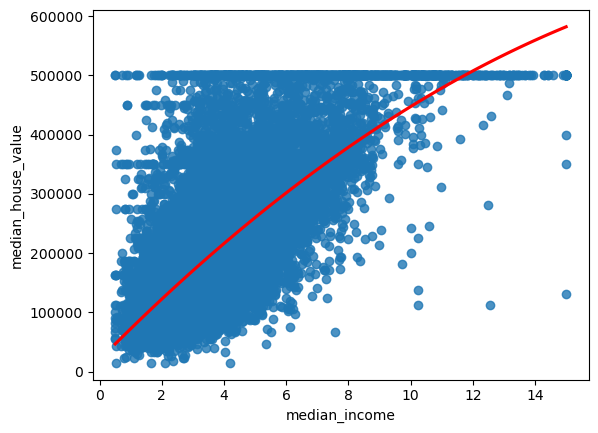

In [21]:
sns.regplot(data = df ,  y = 'median_house_value' ,  x = 'median_income' , order = 2, ci = None ,  line_kws = { "color":"r"}) 
print('Подогнанная прямая') 

In [45]:
df = df.replace(['ISLAND' , 'NEAR OCEAN' , 'NEAR BAY', '<1H OCEAN' , 'INLAND'],[1 , 0.75 , 0.5 , 0.25 , 0])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.5
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0


## Мы заменили значения категориальной переменной на числовые. Теперь расположение внутри континента - 0, в 1ч от океана - 0,25, у залива - 0,5, у океана - 0,75, на острове - 1

## Спецификация
$$
median.house.value = \beta_0 + \beta_1*median.income^2+ \beta_2*ocean.proximity
$$

In [53]:
fitted = smf.ols(formula='np.log(median_house_value)~np.log(median_income)+(ocean_proximity)+(total_bedrooms)+(total_rooms)+(housing_median_age)', data=df).fit()
fitted.params.round(2)

Intercept                10.59
np.log(median_income)     0.88
ocean_proximity           0.65
total_bedrooms            0.00
total_rooms              -0.00
housing_median_age        0.01
dtype: float64

## Спецификация
$$
median.house.value = 10.95 + 0.75*log[median.income] + 0.77*ocean.proximity 
$$

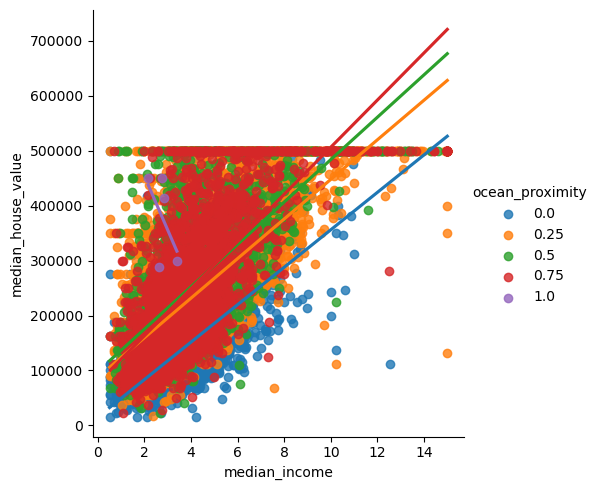

In [54]:
sns.lmplot(data=df, y='median_house_value',x='median_income', ci=None, hue='ocean_proximity')

In [55]:
fitted.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,10.5884,0.012,896.020,0.000,10.565,10.612
np.log(median_income),0.8788,0.007,130.909,0.000,0.866,0.892
ocean_proximity,0.6454,0.011,58.200,0.000,0.624,0.667
total_bedrooms,0.0006,1.96e-05,32.428,0.000,0.001,0.001
total_rooms,-0.0001,3.9e-06,-26.494,0.000,-0.000,-9.56e-05
housing_median_age,0.0057,0.000,25.646,0.000,0.005,0.006


In [51]:
TSS = median_house_value.centered_tss
TSS

6685.262643000324

In [41]:
ESS = median_house_value.ess
ESS

4184.62707685418

In [42]:
RSS = median_house_value.ssr
RSS

2500.635566146144

In [43]:
R2 = median_house_value.rsquared
R2

0.6259480442755101

In [64]:
R_adj = median_house_value.rsquared_adj
R_adj

0.5588109143245019

## Интерпретация
### При увеличении заработка на 0.75%, стоимость жилья повышается на 1%
### При местоположении жилья внутри континента стоимость ниже на 0.77% (?)

## Проверка на гетероскедастичность

In [65]:
df['resid']=fitted.resid
df['resid2']=df['resid']**2

Подогнанная прямая


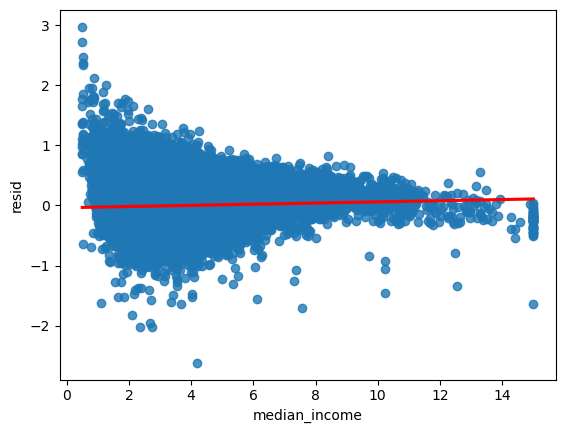

In [66]:
sns.regplot(data = df ,  y = 'resid' ,  x = 'median_income' , order = 1, ci = None ,  line_kws = { "color":"r"}) 
print('Подогнанная прямая')

### Скорее всего является гетероскедастичным, так как чем ниже доход, тем выше разброс стоимости дома